In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import seaborn as sns
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

In [2]:
full = pd.read_csv('C:\\Users\\Curtis\\Desktop\\Springboard\\Capstone_Project1\\data\\Zip_Zhvi_AllHomes.csv')
del full['RegionID'], full['SizeRank'], full['Metro'], full['City']
full = full.fillna(0)

In [3]:
bayarea_counties = ['Alameda', 'Contra Costa', 'Marin', 'Napa', 'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']
point_labels = {'Nantucket':'MA', 'New York':'NY', 'San Miguel':'CO', 'Dukes':'MA'}

In [4]:
grouped = full.groupby(['CountyName', 'State']).mean().transpose()
grouped = grouped.iloc[1:,:]
grouped.index = pd.to_datetime(grouped.index)
grouped_ba = grouped.loc[:,bayarea_counties]
grouped = grouped.drop(bayarea_counties, axis =1)
grouped_ba.columns = grouped_ba.columns.droplevel('State')

pct_change = pd.concat([grouped['2010-01'], grouped['2018-04']]).transpose()
pct_change['change'] = (pct_change.iloc[:,1] - pct_change.iloc[:,0])/(pct_change.iloc[:,0]) * 100
pct_change_ba = pd.concat([grouped_ba['2010-01'], grouped_ba['2018-04']]).transpose()
pct_change_ba['change'] = (pct_change_ba.iloc[:,1] - pct_change_ba.iloc[:,0])/(pct_change_ba.iloc[:,0]) * 100

In [5]:
df = pd.read_csv('C:\\Users\\Curtis\\Desktop\\Springboard\\Capstone_Project1\\data\\Zip_Zhvi_AllHomes.csv',
                 parse_dates = True)
df = df.fillna(0)
df = df.set_index('RegionName')
full = df.drop(['RegionID', 'SizeRank', 'Metro', 'City'], axis = 1)

In [6]:
# Create data frame of Bay Area zip codes
bay_area = full[(full['CountyName'].isin(bayarea_counties)) & (full['State'] == 'CA')]

In [7]:
ba = bay_area.loc[:,'2010-01':'2018-04']

In [8]:
# Create data frame of non-Bay Area zip codes
united_states = full[~((full['CountyName'].isin(bayarea_counties)) & (full['State'] == 'CA'))]
us = united_states.loc[:,'2010-01':'2018-04']

In [9]:
# Create new data frames with 2010 and 2018 data
ba_pc = pd.concat([ba['2010-01'], ba['2018-04']], axis = 1)
us_pc = pd.concat([us['2010-01'], us['2018-04']], axis = 1)

# Add percent change column to each new data frame
ba_pc['change'] = (ba['2018-04'] - ba['2010-01'])/ba['2010-01']
us_pc['change'] = (us['2018-04'] - us['2010-01'])/us['2010-01']

# Remove data with 'inf' change
ba_pc = ba_pc[ba_pc['change'] != float('inf')]
us_pc = us_pc[us_pc['change'] != float('inf')]

In [10]:
# Create dataframe with Bay Area county names and percent change from 2010-01 to 2018-04
ba_pc_county = pd.concat([bay_area['CountyName'], ba_pc], axis = 1, join = 'inner')
ba_pc_county = ba_pc_county.loc[:, ['CountyName', 'change']]

# Bay Area Housing Market

Curtis Higa

## Question:

How does the Bay Area housing market compare to the rest of the United States?

- Since 2010, housing in the Bay Area has risen dramatically
    - Big tech region
    - High turnover rates
    - Political action considered

- Data sampled by zip codes

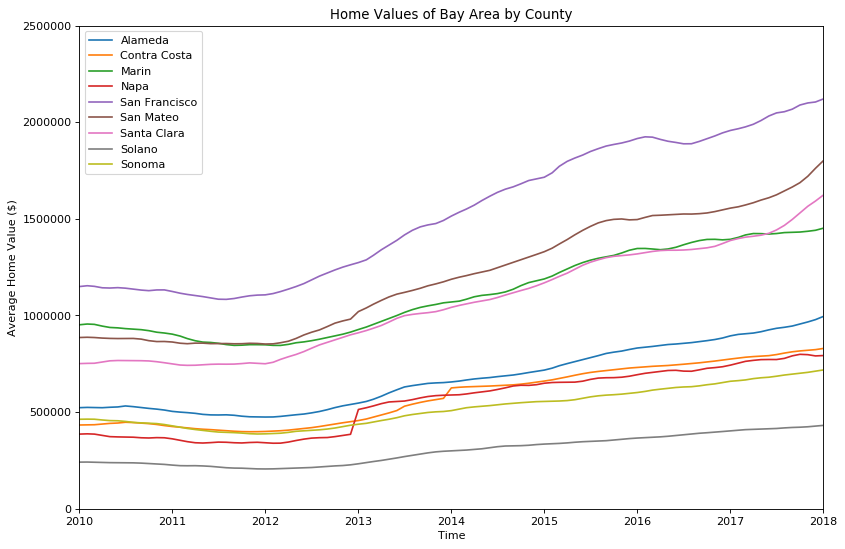

In [11]:
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')

for county in bayarea_counties:
    plt.plot(grouped_ba[county], label = county)
plt.legend()
plt.title('Home Values of Bay Area by County')
plt.xlabel('Time')
plt.ylabel('Average Home Value ($)')
plt.axis(['2010','2018',0,2500000])
plt.show()

## 2018 Bay Area Housing Prices vs. United States

Below shows how Bay Area counties (red) compare to other U.S. counties

- All Bay Area counties above average
- 5 of top 10 counties are Bay Area counties

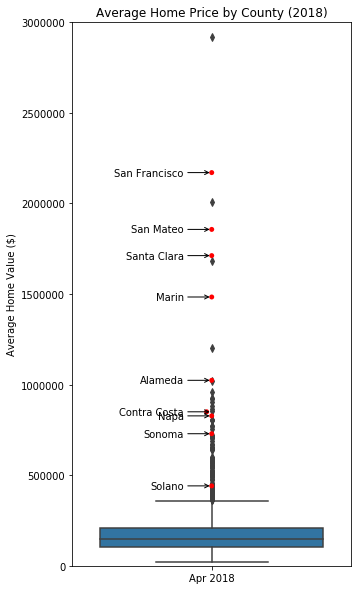

In [47]:
plt.figure(figsize=(5, 10))
_ = sns.boxplot(data = grouped.loc['2018-04',:].transpose())
_ = sns.swarmplot(data = grouped_ba.loc['2018-04',:].transpose(), color = 'red')
_ = plt.title('Average Home Price by County (2018)')
_ = plt.xticks(range(1), ['Apr 2018'])
_ = plt.ylabel('Average Home Value ($)')
_ = plt.ylim([0, 3000000])
for label in bayarea_counties:
    _ = plt.annotate(label,
                    xy = (0, grouped_ba['2018-04'][label]),
                    xytext = (-0.1, grouped_ba['2018-04'][label]),
                    textcoords = 'data', ha = 'right', va = 'center',
                    arrowprops=dict(arrowstyle = '->'))

### 2018 Bay Area Housing Prices vs. United States: Significance

- Difference in mean housing price
    - Bay Area mean: \$1,301,955
    - United States mean: \$267,971

- Statistically and practically significant:
    - Bay Area prices are nearly five times as much as the national average by zip code.

## 2010-2018 Bay Area Housing Price Percent Change vs. United States

- Want to compare how counties have grown since end of Great Recession in 2010
    - Bay Area counties marked in red

- Percent change calculated:
    - $percent\_change = \frac{(April\_2018\_data) - (January\_2010\_data)}{(January\_2010\_data)}$

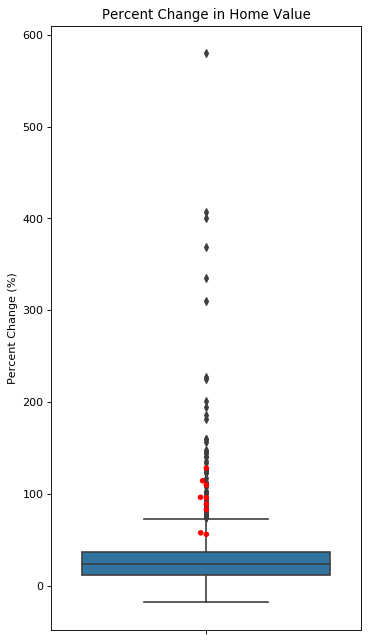

In [48]:
plt.figure(figsize=(5, 10), dpi= 80, facecolor='w', edgecolor='k')

_ = sns.boxplot(pct_change[pct_change['change'] < 600]['change'], orient = 'v')
_ = sns.swarmplot(pct_change_ba['change'],
                  orient = 'v', color = 'red')
_ = plt.title('Percent Change in Home Value')
_ = plt.ylabel('Percent Change (%)')

### 2010-2018 Bay Area Housing Price Percent Change vs. United States: Significance
- Difference in mean percent change
    - Bay Area mean percent change: 95.2%
    - United States mean percent change: 28.8%
- Statistically and practically significant
    - Bay Area prices have nearly doubled on average
    - United States prices on average have hardly grown

## 2018 Bay Area Housing Prices by County
- Saw a gap in prices between cluster of counties
    - "Upper" tier counties
        - Marin
        - San Francisco
        - San Mateo
        - Santa Clara
    - "Lower" tier counties
        - Alameda
        - Contra Costa
        - Napa
        - Solano
        - Sonoma

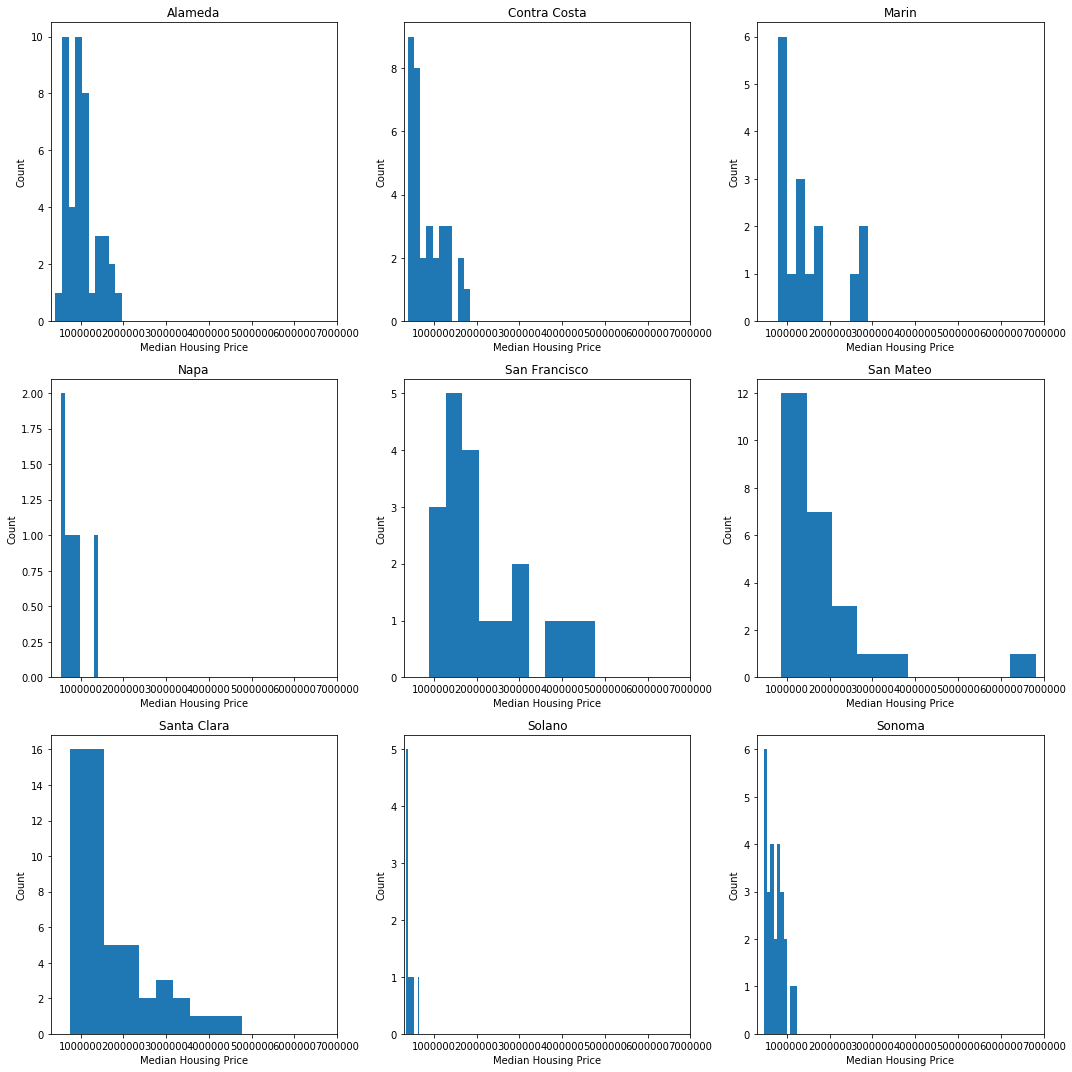

In [57]:
# Plot distribution of median house prices by zip code by Bay Area county
plt.subplots(figsize = (15, 15))
for county in bayarea_counties:
    _ = plt.subplot(3, 3, bayarea_counties.index(county) + 1)
    _ = plt.hist(bay_area[bay_area['CountyName'] == county]['2018-04'])
    _ = plt.title(county)
    _ = plt.xlabel('Median Housing Price')
    _ = plt.ylabel('Count')
    _ = plt.xlim([300000,7000000])
    _ = plt.tight_layout()

### 2018 Bay Area Housing Prices by County: Significance
- There's seems to be gaps in house prices by county
    - "Upper" tier counties have higher house prices on average than the rest of Bay Area
        - Mainly reside on western side of the Bay Area
        - Big tech/business companies are headquartered
    - "Lower" tier county house prices (minus Solano county) are clustered under "upper" tier
    - Solano county has cheaper houses on average
        - Furthest away (not adjacent) from "upper" tier counties
- Statistically and practically significant
    - "Upper" tier county average almost twice "lower" tier county average

## 2010-2018 Bay Area Housing Price Percent Change by County
Compare how each countys' prices have changed since 2010
- Indication on their growth and relevance

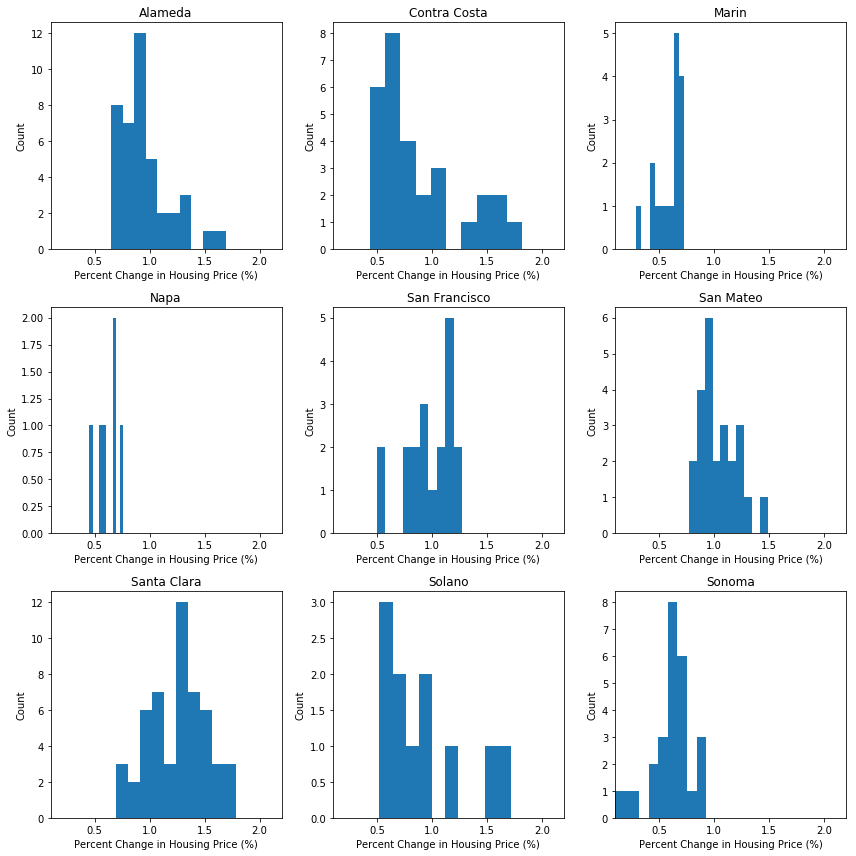

In [58]:
# Plot the distribution of percent change per county by zip code
plt.subplots(figsize = (12, 12))
for county in bayarea_counties:
    _ = plt.subplot(3, 3, bayarea_counties.index(county) + 1)
    _ = plt.hist(ba_pc_county[ba_pc_county['CountyName'] == county]['change'])
    _ = plt.title(county)
    _ = plt.xlabel('Percent Change in Housing Price (%)')
    _ = plt.ylabel('Count')
    _ = plt.xlim([0.1, 2.2])
    _ = plt.tight_layout()

### 2010-2018 Bay Area Housing Price Percent Change by County: Significance
- Significant gaps appear
    - 3 North Bay counties (Marin, Napa, and Sonoma) are clustered together with the smallest percent change
        - All hover aroung 60% change
    - 5 counties (Alameda, Contra Costa, San Francisco, San Mateo, and Solano) clustered in the middle
        - Range from 89% to 104% change
    - Santa Clara county seen the biggest significant change
         - Saw 126% change since 2010
 
- Practical Significance
    - Santa Clara is grew/growing twice as fast as the 3 North Bay counties
    - All Bay Area counties grew faster than the national average

## ARIMA Model
- Autoregressive Integrated Moving Average
    - 3 parameters
        - p: Autoregressive terms
        - d: Differencing order
        - q: Moving average terms

### Model Fitting
- Requires stationary data
- Data starts are January 2012
- Train/test split 70:30

In [16]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.core import datetools

# Read in dataset
df = pd.read_csv('../data/by_zip.csv', index_col = [0,1], header=[0])
df = df.loc[:,'2012-01-01':]

# Group by CountyName
df_grouped = df.groupby('CountyName').mean()
df_grouped.head()

# Assign each CountyName to its own dataset
alameda = df_grouped.loc['Alameda',]
contra_costa = df_grouped.loc['Contra Costa',]
marin = df_grouped.loc['Marin',]
napa = df_grouped.loc['Napa',]
santa_clara = df_grouped.loc['Santa Clara',]
san_fran = df_grouped.loc['San Francisco',]
san_mateo = df_grouped.loc['San Mateo',]
sonoma = df_grouped.loc['Sonoma',]
solano = df_grouped.loc['Solano',]

# Convert indices of each county data set to datetime
county_list = [alameda, contra_costa, marin, napa, santa_clara, san_fran, san_mateo, sonoma, solano]
for county in county_list:
    county.index = pd.to_datetime(county.index)

# Split each CountyName to train and test sets
alameda_train, alameda_test = alameda[:int(len(alameda)*0.7)], alameda[int(len(alameda)*0.7):]
cc_train, cc_test = contra_costa[:int(len(contra_costa)*0.7)], contra_costa[int(len(contra_costa)*0.7):]
marin_train, marin_test = marin[:int(len(marin)*0.7)], marin[int(len(marin)*0.7):]
napa_train, napa_test = napa[:int(len(napa)*0.7)], napa[int(len(napa)*0.7):]
sc_train, sc_test = santa_clara[:int(len(santa_clara)*0.7)], santa_clara[int(len(santa_clara)*0.7):]
sf_train, sf_test = san_fran[:int(len(san_fran)*0.7)], san_fran[int(len(san_fran)*0.7):]
sm_train, sm_test = san_mateo[:int(len(san_mateo)*0.7)], san_mateo[int(len(san_mateo)*0.7):]
sonoma_train, sonoma_test = sonoma[:int(len(sonoma)*0.7)], sonoma[int(len(sonoma)*0.7):]
solano_train, solano_test = solano[:int(len(solano)*0.7)], solano[int(len(solano)*0.7):]

# Create a dictionary with county train/test sets indexed by county name
county_train_test = {'Alameda':[alameda_train, alameda_test, alameda],
                    'Contra Costa':[cc_train, cc_test, contra_costa],
                    'Marin':[marin_train, marin_test, marin],
                    'Napa':[napa_train, napa_test, napa],
                    'Santa Clara':[sc_train, sc_test, santa_clara],
                    'San Francisco':[sf_train, sf_test, san_fran],
                    'San Mateo':[sm_train, sm_test, san_mateo],
                    'Solano':[solano_train, solano_test, solano],
                    'Sonoma':[sonoma_train, sonoma_test, sonoma]}

In [17]:
# Inducing a Stationary Dataset
def moving_avg(dataset, window=12):
    rolling_avg = dataset.rolling(window).mean()
    diff = dataset - rolling_avg
    diff.dropna(inplace=True)
    return diff

def weighted_moving_avg(dataset, hl=12):
    exp_weighted_avg = dataset.ewm(halflife=hl).mean()
    diff = dataset - exp_weighted_avg
    diff.dropna(inplace=True)
    return diff

def differencing(dataset, s):
    diff = dataset - dataset.shift(s)
    diff.dropna(inplace=True)
    return diff

from statsmodels.tsa.seasonal import seasonal_decompose

def decomposing(dataset):
    decomp = seasonal_decompose(dataset)
    
    trend = decomp.trend
    seasonal = decomp.seasonal
    residual = decomp.resid
    
    residual.dropna(inplace=True)
    return residual

In [18]:
# Construct the ARIMA model function
def arima_summary(data, stationary, p, d, q):
    model = ARIMA(data, order=(p, d, q))
    model_fit = model.fit(disp=-1)
    return model_fit

# Create a function to make predictions on the model
def ARIMA_predictions(county, model):
    county_train = county_train_test[county][0]
    
    fitted_values = pd.DataFrame(np.exp(model.predict(typ='levels')), index = county_train.index, columns=['Predictions'])
    fitted_values = fitted_values.fillna(county_train[0])
    
    plt.plot(county_train, color='blue', label='Original')
    plt.plot(fitted_values, color = 'red', label='Predicted')
    plt.legend(loc='best')

    plt.title('RMSE: %.4f' %(np.sqrt(sum(fitted_values['Predictions'] - county_train)**2)/len(alameda_train)))
    plt.show()


def forecast_score(county_name, predict_model, ts_steps=24):
    test_df = pd.DataFrame(county_train_test[county_name][1])
    
    model_forecast = predict_model.forecast(steps = ts_steps)
    model_forecast_values = np.exp(model_forecast[0])
    model_forecast_confid = np.exp(model_forecast[2])
    model_forecast_df = pd.DataFrame(model_forecast_values, index=test_df.index, columns=['Predictions'])
    model_forecast_ci_df = pd.DataFrame(model_forecast_confid, index=test_df.index, columns=['Lower', 'Upper'])
    
    fig, ax = plt.subplots()   
    plt.plot(county_train_test[county_name][2], color='blue', label='Test Data')
    plt.plot(model_forecast_df, color='red', label='Predictions')
    ax.fill_between(model_forecast_ci_df.index,
                    model_forecast_ci_df.iloc[:, 0],
                    model_forecast_ci_df.iloc[:, 1], color='r', alpha=.5)
    plt.legend(loc='best')
    plt.title('%s Test vs. Predictions' %(county_name))
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()
    
    forecast_rsme = np.sqrt(mean_squared_error(test_df, model_forecast_df))
    print('Test RSME: %.4f' %(forecast_rsme))

## Alameda County

In [19]:
### Alameda County

# Take log of data set
alameda_train_log = np.log(alameda_train)

alameda_train_log_diff = differencing(alameda_train_log, 1)

alameda_train_p = 3
alameda_train_q = 2

alameda_model_fit = arima_summary(alameda_train_log, alameda_train_log_diff, alameda_train_p, 1, alameda_train_q)

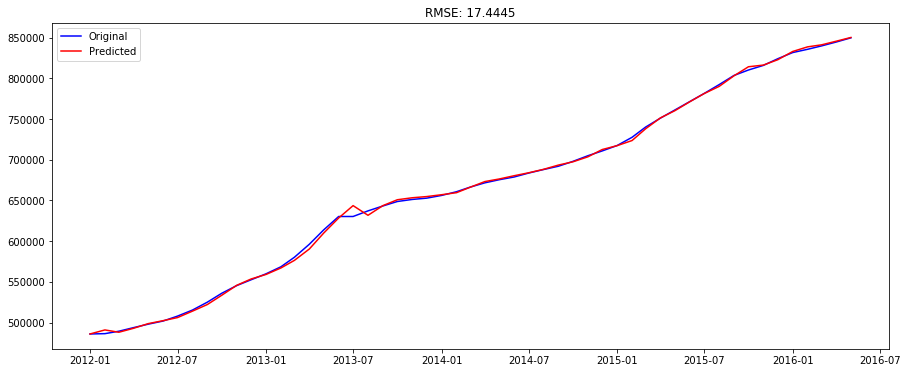

In [59]:
ARIMA_predictions('Alameda', alameda_model_fit)

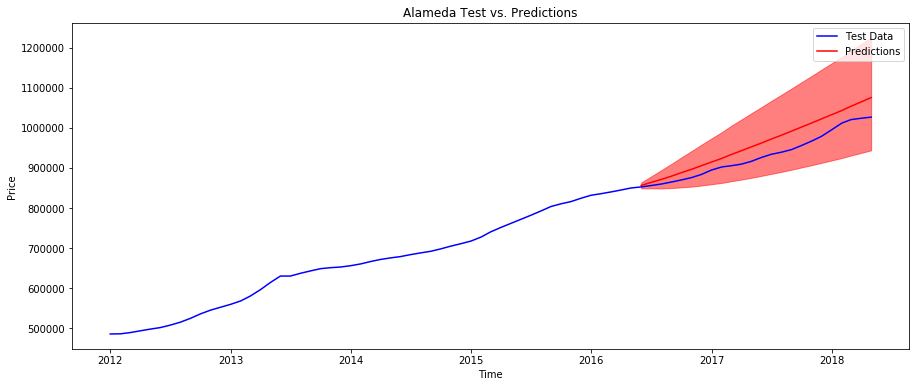

Test RSME: 32833.5954


In [60]:
forecast_score('Alameda', alameda_model_fit)

- Fairly good predictions
- Gradual rise in prices

## Contra Costa County

In [22]:
### Contra Costa County

cc_train_log = np.log(cc_train)

cc_wma = weighted_moving_avg(cc_train_log, hl=12)

cc_train_p=9
cc_train_q =2

cc_model_fit = arima_summary(cc_train_log, cc_wma, cc_train_p, 1, cc_train_q)

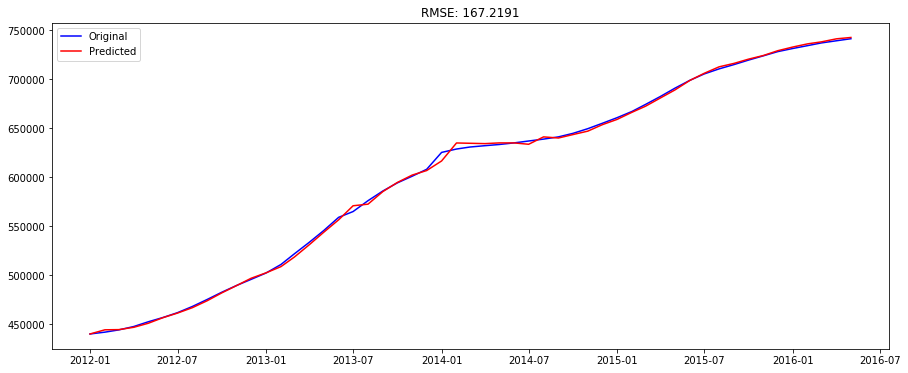

In [61]:
ARIMA_predictions('Contra Costa', cc_model_fit)

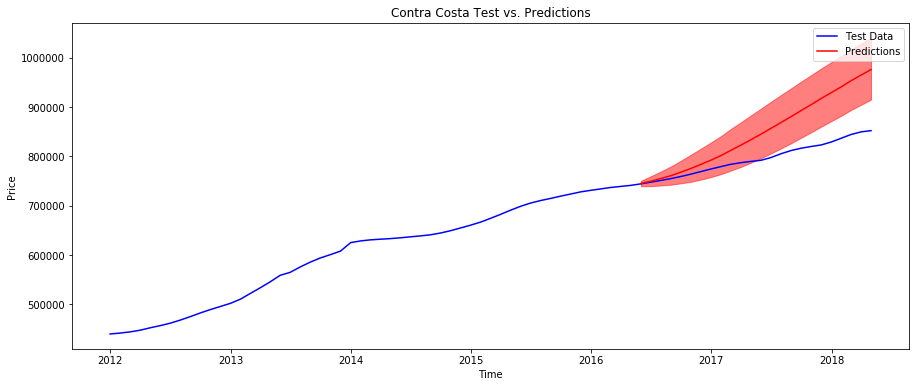

Test RSME: 65787.7739


In [62]:
forecast_score('Contra Costa', cc_model_fit)

- Poor model predictions
    + Parameter tuning
    + Stationary data set

## Marin County

In [25]:
### Marin County

marin_train_log = np.log(marin_train)

marin_train_resid = decomposing(marin_train_log)

marin_train_p = 4
marin_train_q = 2

marin_model_fit = arima_summary(marin_train_log, marin_train_resid, marin_train_p, 2, marin_train_q)

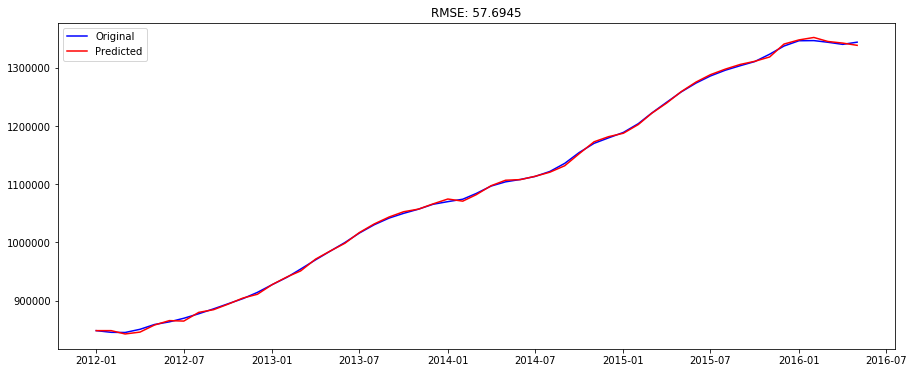

In [63]:
ARIMA_predictions('Marin', marin_model_fit)

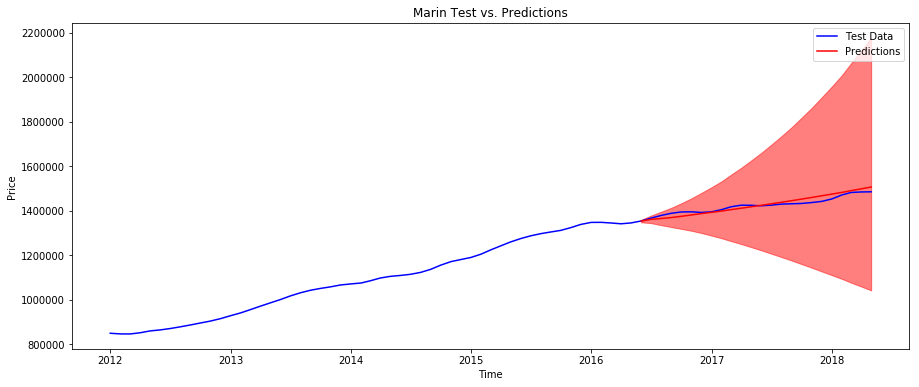

Test RSME: 14160.5829


In [64]:
forecast_score('Marin', marin_model_fit)

- Good model
- Growing confidence interval
    + Not good for long term predictions

## Napa County

In [28]:
### Napa County

napa_train_log = np.log(napa_train)

napa_wma = weighted_moving_avg(napa_train_log, hl=12)

napa_train_p = 7
napa_train_q = 2

napa_model_fit = arima_summary(napa_train_log, napa_wma, napa_train_p, 1, napa_train_q)

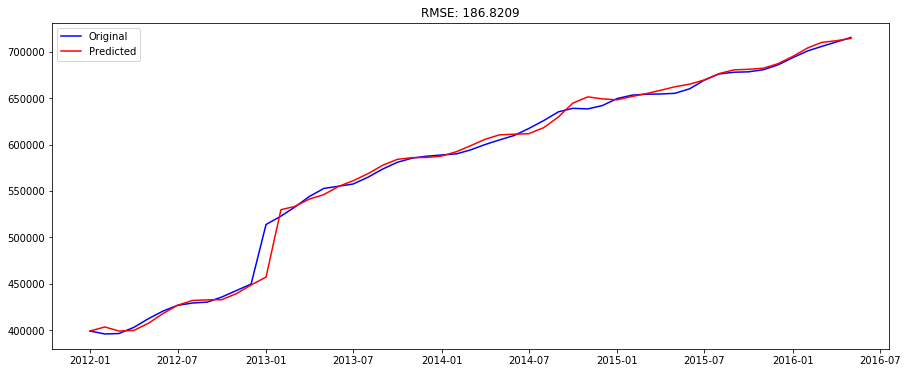

In [65]:
ARIMA_predictions('Napa', napa_model_fit)

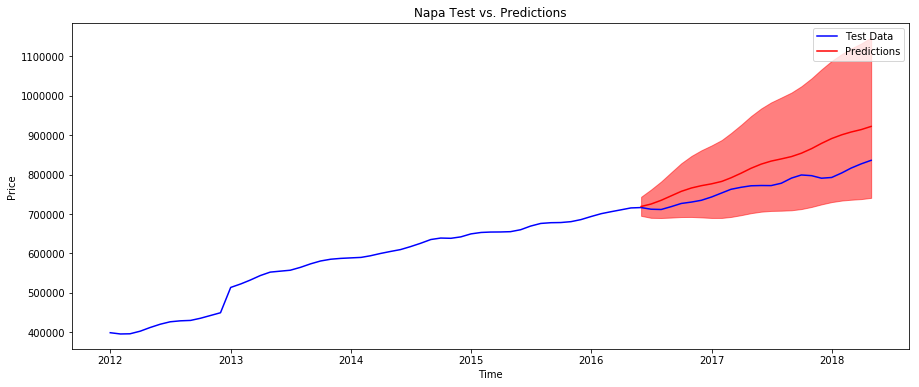

Test RSME: 58725.6706


In [66]:
forecast_score('Napa', napa_model_fit)

- Fairly good model
- Test data lies within confidence interval

## San Francisco County

In [31]:
### San Francisco County

sf_train_log = np.log(sf_train)

sf_train_resid = decomposing(sf_train_log)

sf_train_p = 2
sf_train_q = 2

sf_model_fit = arima_summary(sf_train_log, sf_train_resid, sf_train_p, 2, sf_train_q)

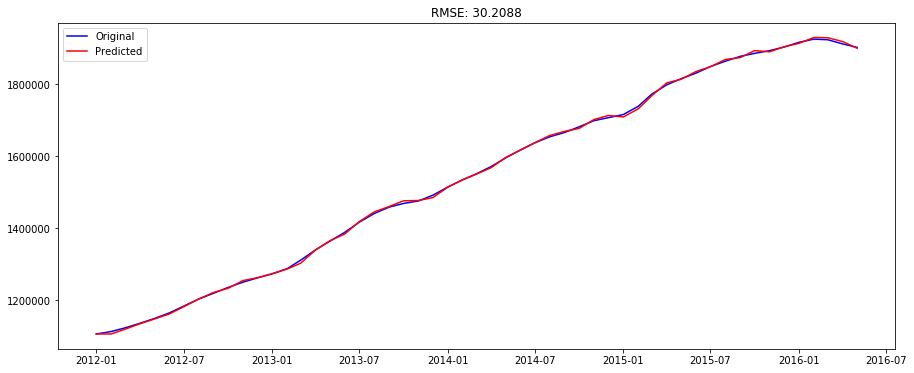

In [67]:
ARIMA_predictions('San Francisco', sf_model_fit)

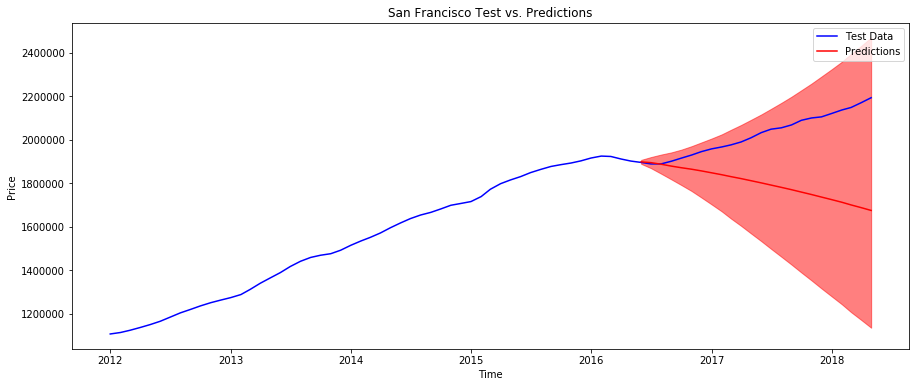

Test RSME: 275504.6893


In [68]:
forecast_score('San Francisco', sf_model_fit)

- Poor model
    + Poor predictions
    + Growing confidence interval
- More stationary data
- Parameter tuning

## San Mateo County

In [34]:
### San Mateo County

sm_train_log = np.log(sm_train)

sm_train_resid = decomposing(sm_train_log)

sm_train_p=3
sm_train_q=2

sm_model_fit = arima_summary(sm_train_log, sm_train_resid, sm_train_p, 2, sm_train_q)

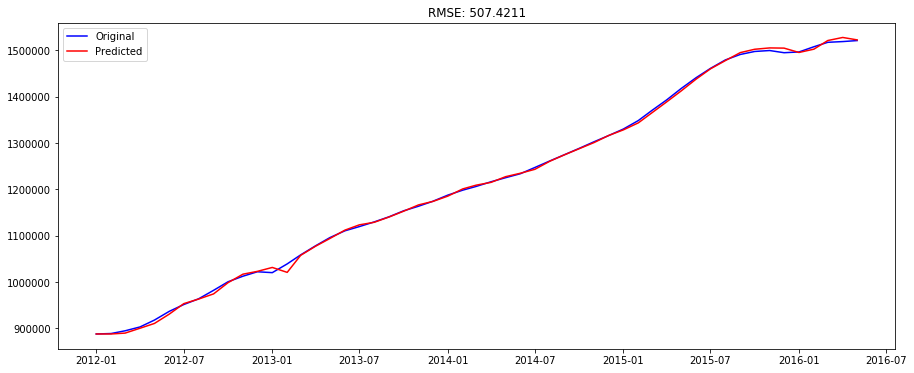

In [69]:
ARIMA_predictions('San Mateo', sm_model_fit)

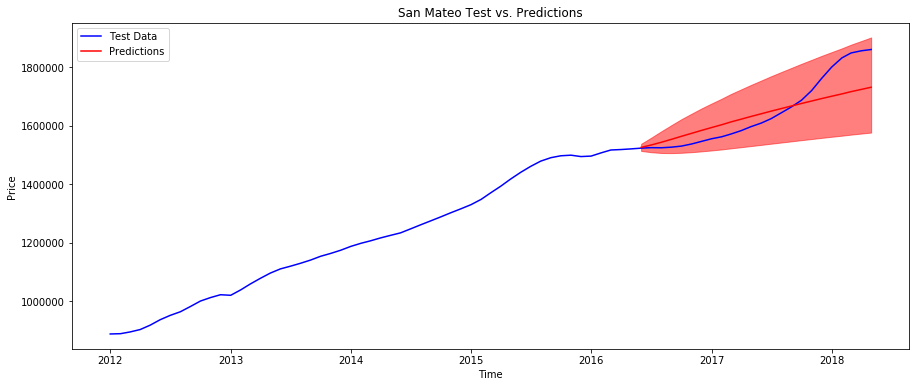

Test RSME: 63677.1799


In [70]:
forecast_score('San Mateo', sm_model_fit)

- Fair model
- Predicts overall trend
- Erratic test data

## Santa Clara County

In [37]:
### Santa Clara County

sc_train_log = np.log(sc_train)

sc_train_log_diff = differencing(sc_train_log, 12)

sc_double_diff = differencing(sc_train_log_diff, 1)

sc_train_p=3
sc_train_q=2

sc_model_fit = arima_summary(sc_train_log, sc_double_diff, sc_train_p, 2, sc_train_q)

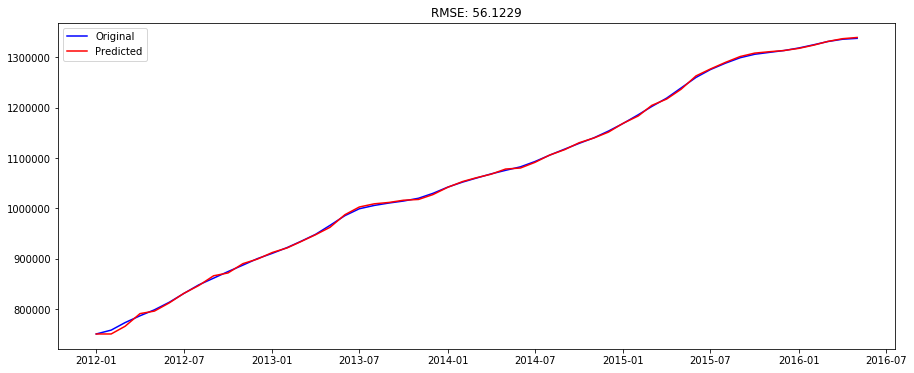

In [71]:
ARIMA_predictions('Santa Clara', sc_model_fit)

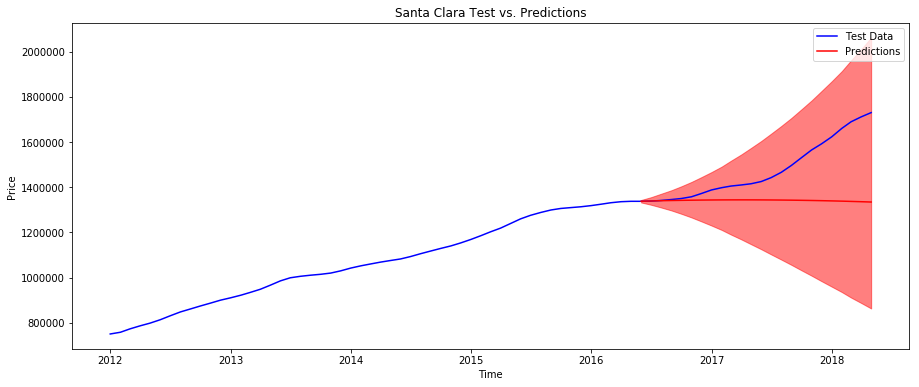

Test RSME: 185958.1838


In [72]:
forecast_score('Santa Clara', sc_model_fit)

- Poor model
    + Predicts flat trend
    + Growing confidence interval
- More stationary data

## Solano County

In [40]:
### Solano County

solano_train_log = np.log(solano_train)

solano_train_log_diff = differencing(solano_train_log, 12)

solano_double_diff = differencing(solano_train_log_diff, 1)

solano_train_p = 5
solano_train_q = 2

solano_model_fit = arima_summary(solano_train_log, solano_double_diff, solano_train_p, 2, solano_train_q)

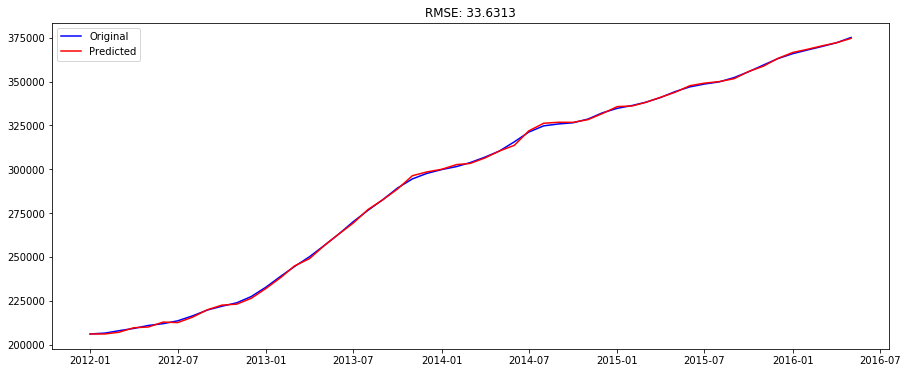

In [73]:
ARIMA_predictions('Solano', solano_model_fit)

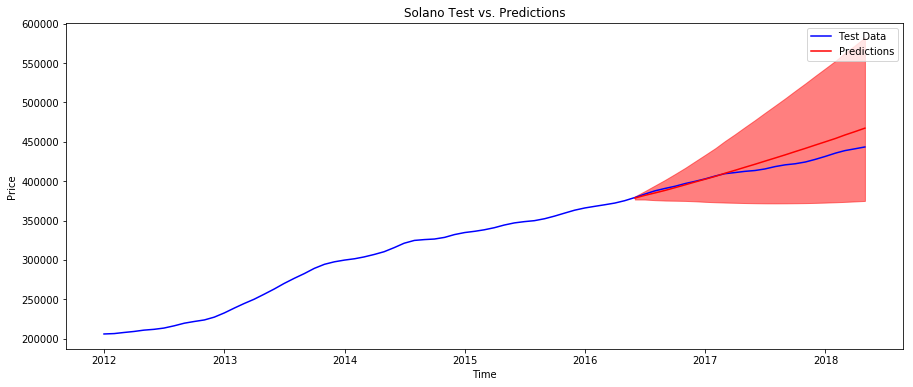

Test RSME: 12061.3198


In [74]:
forecast_score('Solano', solano_model_fit)

- Good model
- Predicts growing trend

## Sonoma County

In [43]:
### Sonoma County

sonoma_train_log = np.log(sonoma_train)

sonoma_train_resid = decomposing(sonoma_train_log)

sonoma_train_p=3
sonoma_train_q=2

sonoma_model_fit = arima_summary(sonoma_train_log, sonoma_train_resid, sonoma_train_p, 2, sonoma_train_q)

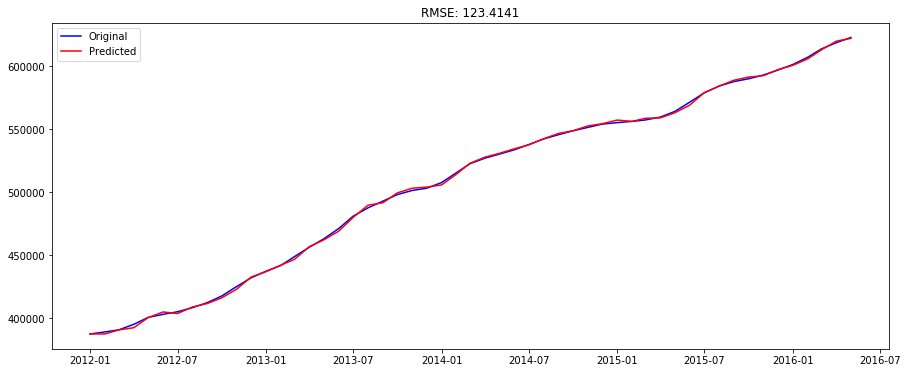

In [75]:
ARIMA_predictions('Sonoma', sonoma_model_fit)

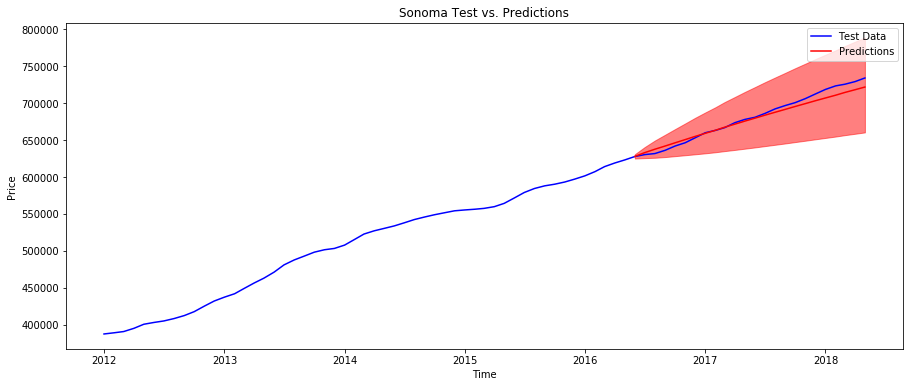

Test RSME: 6526.3201


In [76]:
forecast_score('Sonoma', sonoma_model_fit)

- Good model
- Predicts growing trend

## Bay Area Conclusions
- Most counties are predicted to rise
- Models could use tuning
    + More stationary data
    + More data
    + Parameter tuning